# Model Algoritma Sistem Diagnosa Penyakit Diabetes pada Wanita

## Tema Proyek

Dalam proyek kali ini, kita memilih tema Kesehatan Diri dan Mental. Adapun latar belakang kenapa Kita memilih tema ini, antara lain :
- Bidang kesehatan sering dijumpai dalam kegiatan sehari-hari terutama dalam pelayanan kesehatan.
- Dalam pelayanan kesehatan juga sangat berkaitan dengan data-data pasien untuk mendiagnosis penyakit.
- Dari data-data pasien tersebut, kita dapat mengetahui bagaimana cara memastikan jenis penyakit diabetes dengan cepat dan tepat.


## Business Understanding

Diabetes adalah penyakit kronis yang terjadi baik ketika pankreas tidak menghasilkan cukup insulin atau ketika tubuh tidak dapat secara efektif menggunakan insulin atau hormon yang mengatur gula darah yang dihasilkannya. Berdasarkan data WHO pada tahun 2019, diabetes merupakan penyebab kematian kesembilan dengan perkiraan 1,5 juta kematian secara langsung disebabkan oleh diabetes. Melalui penelitian yang dilakukan oleh BMJ Diabetes Research & Care, wanita yang bekerja 45 jam atau lebih dalam seminggu dikaitkan dengan risiko diabetes.

Bayangkan jika Anda seorang petugas medis yang bertugas untuk mengecek data pasien di sebuah perusahaan yang bergerak di bidang jasa pelayanan kesehatan. Pekerjaan ini berhubungan dengan banyak data-data pasien, sehingga memerlukan waktu untuk memastikan pasien benar-benar terjangkit penyakit diabetes. Untuk efisiensi, kami ingin menerapkan automasi pada sistem dalam memprediksi penyakit diabetes dengan teknik predictive modelling.

### Problem Statement

- Teknik predictive apakah yang tepat untuk menentukan penyakit diabetes?
- Apakah dengan dibuatkan sistem diagnosa penyakit diabetes ini hasil akhirnya akan akurat untuk mendiagnosis penyakit ?

### Goals

- Membuat model machine learning yang dapat memprediksi penyakit diabetes dengan tepat.
- Mengetahui bagaimana hasil akhir sistem diagnosa penyakit diabetes.

### Solution statements

- **Boosting Algorithm**, Metode ini bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.

- **Decision Tree**, adalah salah satu algoritma supervised learning yang dapat dipakai untuk masalah klasifikasi dan regresi. Decision tree merupakan algoritma yang powerful alias mampu dipakai dalam masalah yang kompleks.

- **K-Nearest Neighbor**, adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

- **Random Forest**, salah satu algoritma supervised learning. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.

- **Support Vector Machines (SVM)**, adalah model ML multifungsi yang dapat digunakan untuk menyelesaikan permasalahan klasifikasi, regresi, dan pendeteksian outlier. Termasuk ke dalam kategori supervised learning, SVM adalah salah satu metode yang paling populer dalam machine learning.

## Data Understanding

In [1]:
# library yang di butuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import pickle

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/dandia14/project-capstone-team-csd-134/ml/dataset/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Mengecek informasi dataset dengan fungsi info()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Mengecek deskripsi statistik data dengan fitur describe()
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Menangani Missing Value

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Mengetahui missing value
glucose = (diabetes.Glucose == 0).sum()
bloodPressure = (diabetes.BloodPressure == 0).sum()
skinThickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()
diabetesPedigreeFunction = (diabetes.DiabetesPedigreeFunction == 0).sum()
age = (diabetes.Age == 0).sum()

print("Nilai 0 di kolom Glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", bloodPressure)
print("Nilai 0 di kolom SkinThickness ada: ", skinThickness)
print("Nilai 0 di kolom Insulin ada: ", insulin)
print("Nilai 0 di kolom BMI ada: ", bmi)
print("Nilai 0 di kolom DiabetesPedigreeFunction ada: ", diabetesPedigreeFunction)
print("Nilai 0 di kolom Age ada: ", age)

Nilai 0 di kolom Glucose ada:  5
Nilai 0 di kolom BloodPressure ada:  35
Nilai 0 di kolom SkinThickness ada:  227
Nilai 0 di kolom Insulin ada:  374
Nilai 0 di kolom BMI ada:  11
Nilai 0 di kolom DiabetesPedigreeFunction ada:  0
Nilai 0 di kolom Age ada:  0


In [7]:
# Mengganti nilai 0 dengan NaN pada Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    diabetes[col].replace(0,np.NaN,inplace=True)

In [8]:
# Mengganti nilai NaN dengan nilai median sesuai target Outcome
for col in diabetes.columns:
    diabetes.loc[(diabetes["Outcome"]==0) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==0][col].median()
    diabetes.loc[(diabetes["Outcome"]==1) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==1][col].median()

In [9]:
# Mengecek kembali missing value
glucose = (diabetes.Glucose == 0).sum()
bloodPressure = (diabetes.BloodPressure == 0).sum()
skinThickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()

print("Nilai 0 di kolom Glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", bloodPressure)
print("Nilai 0 di kolom SkinThickness ada: ", skinThickness)
print("Nilai 0 di kolom Insulin ada: ", insulin)
print("Nilai 0 di kolom BMI ada: ", bmi)

Nilai 0 di kolom Glucose ada:  0
Nilai 0 di kolom BloodPressure ada:  0
Nilai 0 di kolom SkinThickness ada:  0
Nilai 0 di kolom Insulin ada:  0
Nilai 0 di kolom BMI ada:  0


In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
# Mengecek kembali deskripsi statik data maka akan terlihat berbeda dengan sebelumnya
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Menangani Outliers

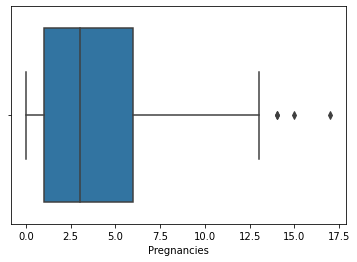

In [12]:
sns.boxplot(x=diabetes['Pregnancies'])

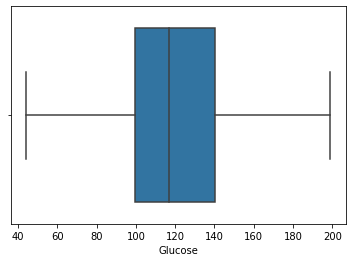

In [13]:
sns.boxplot(x=diabetes['Glucose'])

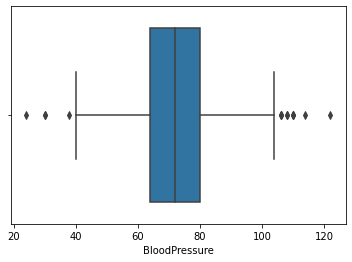

In [14]:
sns.boxplot(x=diabetes['BloodPressure'])

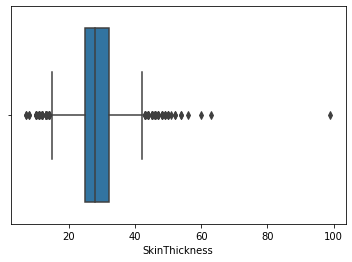

In [15]:
sns.boxplot(x=diabetes['SkinThickness'])

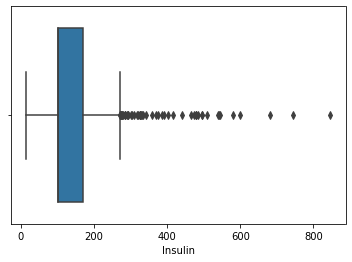

In [16]:
sns.boxplot(x=diabetes['Insulin'])

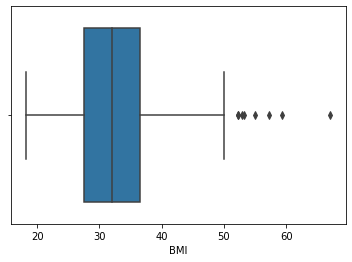

In [17]:
sns.boxplot(x=diabetes['BMI'])

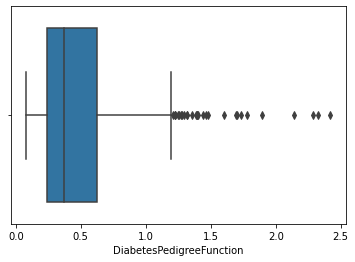

In [18]:
sns.boxplot(x=diabetes['DiabetesPedigreeFunction'])

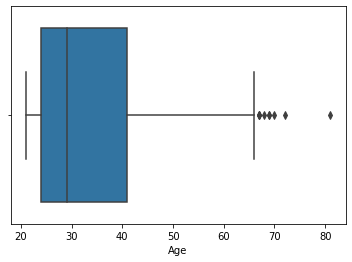

In [19]:
sns.boxplot(x=diabetes['Age'])

In [20]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR=Q3-Q1
diabetes=diabetes[~((diabetes<(Q1-1.5*IQR))|(diabetes>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
diabetes.shape

(590, 9)

In [21]:
numerical_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
categorical_features = ['Outcome']

   jumlah sampel  persentase
0            398        67.5
1            192        32.5


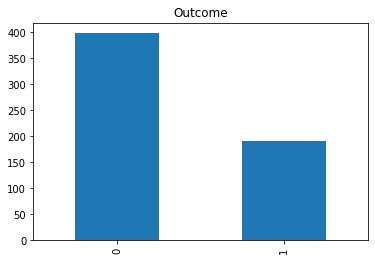

In [22]:
# Menampilkan jumlah sample pada outcome
feature = categorical_features[0]
count = diabetes[feature].value_counts()
percent = 100*diabetes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

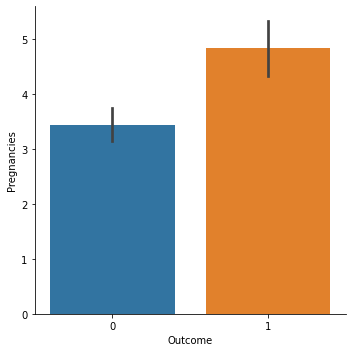

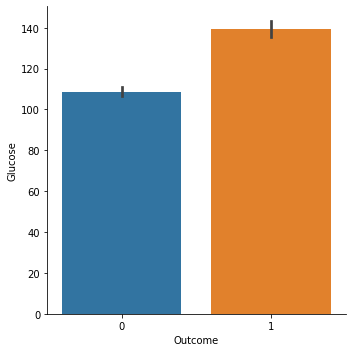

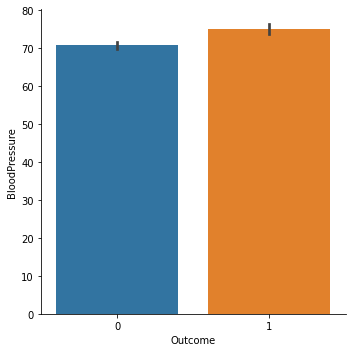

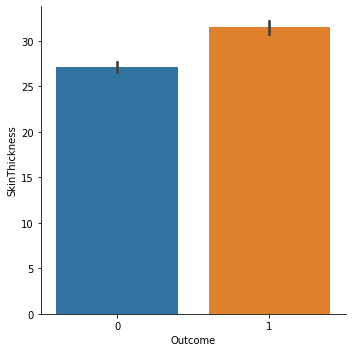

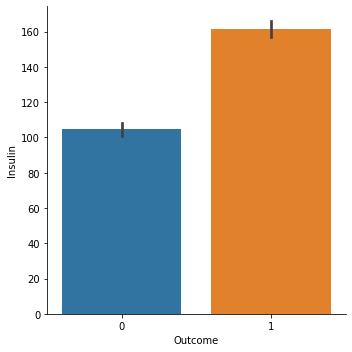

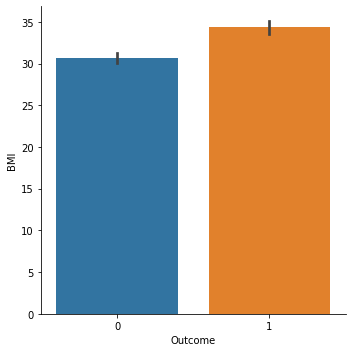

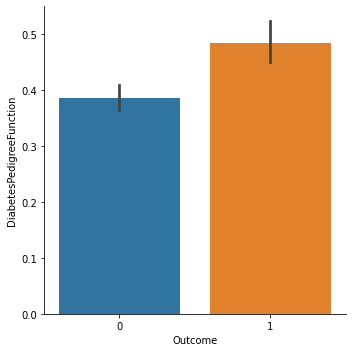

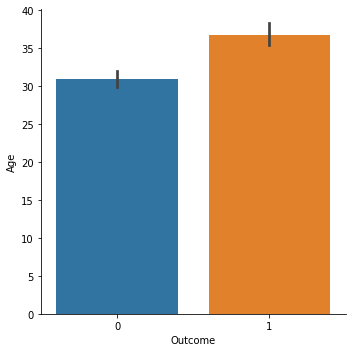

In [23]:
# Menampilkan berbagai fitur berdasarkan Outcome
cols = diabetes[numerical_features]
for col in cols:
  sns.catplot(x="Outcome", y=col, data=diabetes, kind="bar")

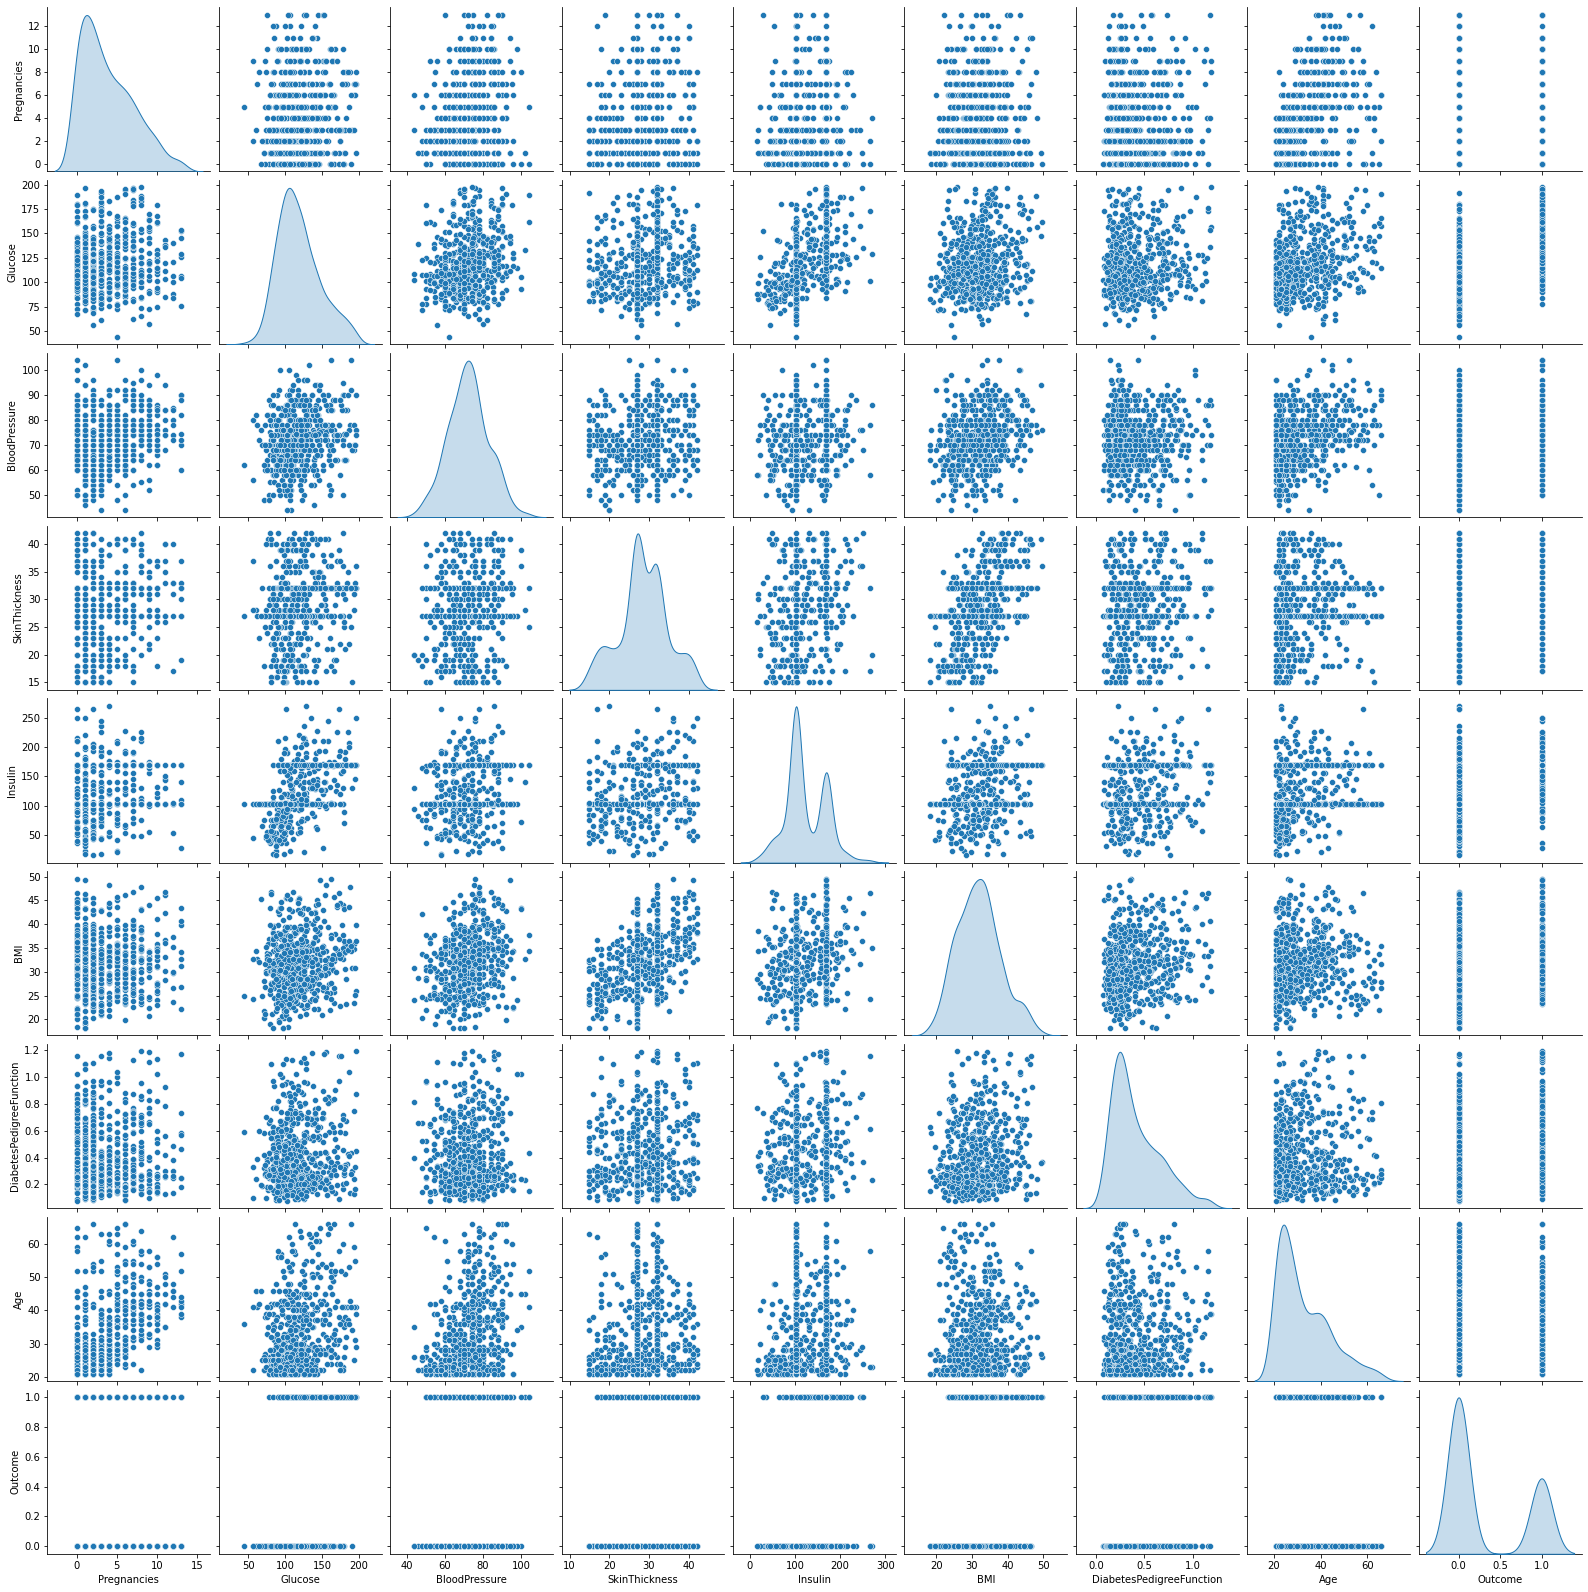

In [24]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diabetes, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

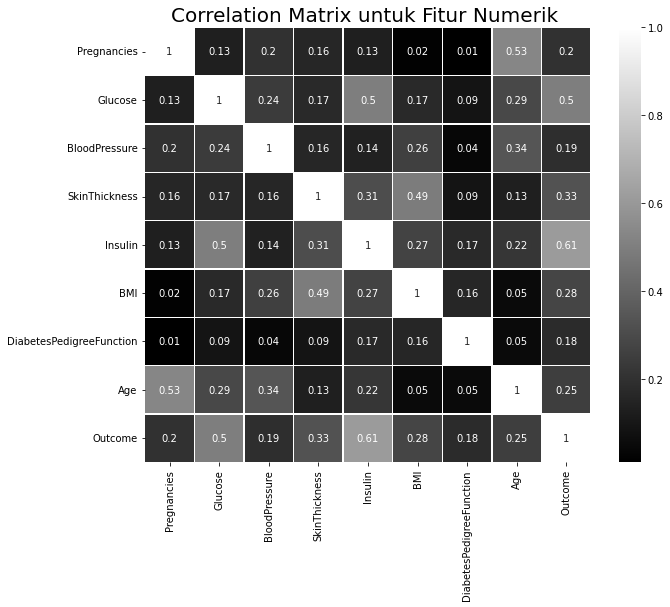

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='gray', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [26]:
diabetes.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Insulin                     0.606485
Glucose                     0.497826
SkinThickness               0.334381
BMI                         0.276766
Age                         0.245605
Pregnancies                 0.200335
BloodPressure               0.190899
DiabetesPedigreeFunction    0.182698
Name: Outcome, dtype: float64

## Data Preparation

In [27]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [28]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Standarisasi dengan menggunakan teknik StandarScaler dari library Scikitlearn

In [29]:
numerical_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
62,0.318956,-2.612904,-0.965592,-0.227943,-0.445103,-1.107217,0.603884,0.291443
652,0.318956,0.177107,0.160319,1.847220,-1.023890,0.346553,-0.638262,-0.440266
741,-0.282031,-0.564542,-2.654460,-1.345339,-0.638032,-0.180638,-0.126560,-0.623193
344,1.220438,-0.811758,-0.027333,-0.227943,-0.445103,0.777892,0.205460,2.212179
551,-0.282031,-1.200241,-0.402637,0.250941,-0.365661,-0.004908,0.619509,-0.714656


In [30]:
X_train[numerical_features].describe().round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,472.0000,472.0000,472.0000,472.0000,472.0000,472.0000,472.0000,472.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0011,1.0011,1.0011,1.0011,1.0011,1.0011,1.0011,1.0011
min,-1.1835,-2.6129,-2.6545,-2.1435,-2.4084,-2.1936,-1.3609,-1.0805
25%,-0.8830,-0.7058,-0.6841,-0.3876,-0.4451,-0.6958,-0.7525,-0.8061
50%,-0.2820,-0.1407,-0.0273,-0.2279,-0.4451,-0.0528,-0.3141,-0.3488
75%,0.6195,0.5656,0.5356,0.5702,1.0756,0.6062,0.6107,0.6573
max,2.7229,2.7905,2.9751,2.1665,3.2432,2.8228,2.9632,3.0354


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1

## Modeling

In [31]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['DecisionTree', 'SVM', 'RandomForestClassification', 'KNeighborsClassification', 'AdaBoostClassifier'])

In [32]:
# membuat model Decision Tree
decisiontree = DecisionTreeClassifier() 
# melakukan pelatihan model terhadap data
decisiontree.fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_train)

In [33]:
# membuat model SVM
svm = SVC()
# melakukan pelatihan model terhadap data
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)

In [34]:
# membuat model Random Forest Classification
rfc = RandomForestClassifier()
# melakukan pelatihan model terhadap data
rfc.fit(X_train, y_train)
models.loc['train_mse','RandomForestClassification'] = mean_squared_error(y_pred=rfc.predict(X_train), y_true=y_train)

In [35]:
# membuat model KNeighbors Classification
knnc = KNeighborsClassifier()
# melakukan pelatihan model terhadap data
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_train)

In [36]:
# membuat model AdaBoost Classifier
adaboost = AdaBoostClassifier()
# melakukan pelatihan model terhadap data                        
adaboost.fit(X_train, y_train)
models.loc['train_mse','AdaBoostClassifier'] = mean_squared_error(y_pred=adaboost.predict(X_train), y_true=y_train)

## Evaluation

In [37]:
# untuk proses scaling
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [38]:
mse = pd.DataFrame(columns=['train', 'test'], index=['DecisionTree', 'SVM', 'RandomForestClassification', 'KNeighborsClassification', 'AdaBoostClassifier'])
model_dict = {'DecisionTree': decisiontree, 'SVM': svm, 'RandomForestClassification': rfc, 'KNeighborsClassification': knnc, 'AdaBoostClassifier':adaboost}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
DecisionTree,0,0.000144068
SVM,7.62712e-05,0.000152542
RandomForestClassification,0,9.32203e-05
KNeighborsClassification,8.26271e-05,0.000152542
AdaBoostClassifier,3.38983e-05,0.000135593


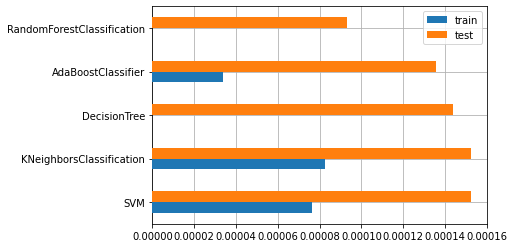

In [39]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa model Random Forest Classifier memberikan nilai eror yang paling kecil. Model inilah yang mungkin akan kita pilih sebagai model terbaik untuk melakukan prediksi penyakit diabetes.

In [40]:
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_DecisionTree,prediksi_SVM,prediksi_RandomForestClassification,prediksi_KNeighborsClassification,prediksi_AdaBoostClassifier
295,0,0,1,0,0,1
20,0,1,1,0,1,0
110,1,0,1,1,1,0


Dari gambar di atas, terlihat semua model memberikan hasil prediksi yang cukup tepat.

## Export Model

In [74]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [75]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X

In [76]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of faetures to consider at every split
max_features = ['auto', 'sqrt']
# Maximun number of levels in tree
max_depth = [2, 4]
# Minimum number of samples required to split a node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [78]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [79]:
rf_Model = RandomForestClassifier()

In [80]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [81]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [82]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 30}

In [83]:
y_pred = rf_Grid.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8898305084745762


In [84]:
print(f'Train Accuracy - : {rf_Grid.score(X_train, y_train):.3f}')
print(f'Test Accuracy - : {rf_Grid.score(X_test, y_test):.3f}')

Train Accuracy - : 0.928
Test Accuracy - : 0.890


In [85]:
pickle.dump(rf_Grid, open('model_rfc.pkl', 'wb'))

In [86]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0


In [87]:
data1 = [10,	168,	74,	32,	169.5,	38,	0.537,	34]
data2 = [4,	110,	92,	27,	102.5,	37.6,	0.191,	30]
data1 = np.array(data1)
data2 = np.array(data2)

data1 = data1.reshape(1,-1)
data2 = data2.reshape(1,-1)
print(data1)
print(data2)

[[ 10.    168.     74.     32.    169.5    38.      0.537  34.   ]]
[[  4.    110.     92.     27.    102.5    37.6     0.191  30.   ]]


In [88]:
location = './model_rfc.pkl'
file = open(location, "rb")
model = pickle.load(file)

In [89]:
prediction1 = model.predict(data1)
prediction2 = model.predict(data2)

print(prediction1)
print(prediction2)

[1]
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
